In [11]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Lendo arquivos .pkl
list_M = [4, 16, 64]            # Ordem da modulação
list_LOSPR  = [6, 8, 10, 12, 14, 16, 18] # LOSPR do sistema

list_OSNR_BR = [[],[],[]]
list_BER_BR = [[],[],[]]

for idx_Recpt in ['BR']: # Receptor
    for idx, idx_M in enumerate(list_M):
        for idx_LOSPR in list_LOSPR:
            nameFile = f'.\\arquivosPickle\\fig3B_{idx_Recpt}_{idx_M}QAM_LOSPR-{idx_LOSPR}dB.pkl'
            with open(nameFile, 'rb') as arquivo:
                data = pickle.load(arquivo)
                list_OSNR_BR[idx].append(data['OSNR'])
                list_BER_BR[idx].append(data['BER'])
                
list_OSNR_SER = [[],[],[]]
list_BER_SER = [[],[],[]]

for idx_Recpt in ['SER']: # Receptor
    for idx_M in ['4']:
        for idx_LOSPR in list_LOSPR:
            nameFile = f'.\\arquivosPickle\\fig3B_{idx_Recpt}_{idx_M}QAM_LOSPR-{idx_LOSPR}dB.pkl'
            with open(nameFile, 'rb') as arquivo:
                data = pickle.load(arquivo)
                list_OSNR_SER[0].append(data['OSNR'])
                list_BER_SER[0].append(data['BER'])

for idx_Recpt in ['SER']: # Receptor
    for idx_M in ['16']:
        for idx_LOSPR in [8, 10, 12, 14, 16, 18]:
            nameFile = f'.\\arquivosPickle\\fig3B_{idx_Recpt}_{idx_M}QAM_LOSPR-{idx_LOSPR}dB.pkl'
            with open(nameFile, 'rb') as arquivo:
                data = pickle.load(arquivo)
                list_OSNR_SER[1].append(data['OSNR'])
                list_BER_SER[1].append(data['BER'])
                
for idx_Recpt in ['SER']: # Receptor
    for idx_M in ['64']:
        for idx_LOSPR in [14, 16, 18]:
            nameFile = f'.\\arquivosPickle\\fig3B_{idx_Recpt}_{idx_M}QAM_LOSPR-{idx_LOSPR}dB.pkl'
            with open(nameFile, 'rb') as arquivo:
                data = pickle.load(arquivo)
                list_OSNR_SER[2].append(data['OSNR'])
                list_BER_SER[2].append(data['BER'])

In [12]:
while len(list_OSNR_SER[1]) < len(list_OSNR_BR[1]):
    list_OSNR_SER[1].insert(0, np.nan)

while len(list_OSNR_SER[2]) < len(list_OSNR_BR[1]):
    list_OSNR_SER[2].insert(0, np.nan)

while len(list_BER_SER[1]) < len(list_BER_BR[1]):
    list_BER_SER[1].insert(0, np.nan)

while len(list_BER_SER[2]) < len(list_BER_BR[1]):
    list_BER_SER[2].insert(0, np.nan)

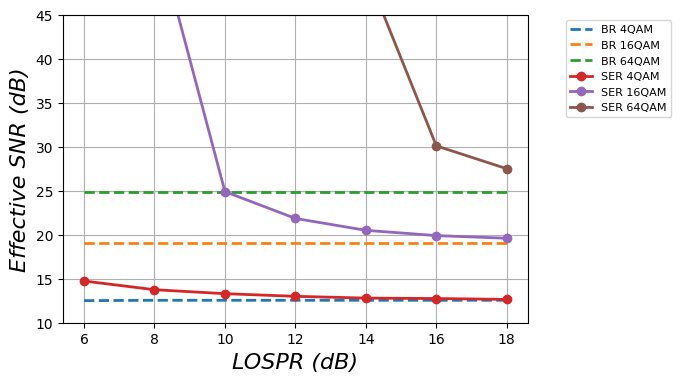

,BR 4QAM,BR 16QAM,BR 64QAM,SER 4QAM,SER 16QAM,SER 64QAM
LOSPR 06 (dB),2.04e-02,2.04e-02,2.04e-02,2.01e-02,nan,nan
LOSPR 08 (dB),2.04e-02,2.03e-02,2.01e-02,2.05e-02,2.82e-02,nan
LOSPR 10 (dB),2.03e-02,2.04e-02,2.03e-02,2.05e-02,2.01e-02,nan
LOSPR 12 (dB),2.04e-02,2.07e-02,2.03e-02,2.04e-02,2.02e-02,nan
LOSPR 14 (dB),2.03e-02,2.03e-02,2.03e-02,2.03e-02,2.06e-02,2.69e-02
LOSPR 16 (dB),2.03e-02,2.06e-02,2.04e-02,2.05e-02,2.08e-02,2.05e-02
LOSPR 18 (dB),2.01e-02,2.01e-02,2.08e-02,2.02e-02,2.00e-02,2.02e-02


In [13]:
plt.figure(figsize=(6,4))
plt.plot(list_LOSPR, list_OSNR_BR[0], '--', linewidth=2.0, label= 'BR 4QAM')
plt.plot(list_LOSPR, list_OSNR_BR[1], '--', linewidth=2.0, label= 'BR 16QAM')
plt.plot(list_LOSPR, list_OSNR_BR[2], '--', linewidth=2.0, label= 'BR 64QAM')
plt.plot(list_LOSPR, list_OSNR_SER[0], 'o-', linewidth=2.0, label= 'SER 4QAM')
plt.plot(list_LOSPR, list_OSNR_SER[1], 'o-', linewidth=2.0, label= 'SER 16QAM')
plt.plot(list_LOSPR, list_OSNR_SER[2], 'o-', linewidth=2.0, label= 'SER 64QAM')
plt.ylabel('Effective SNR (dB)', fontsize=16.0, fontstyle="oblique")
plt.xlabel('LOSPR (dB)', fontsize=16.0, fontstyle="oblique")
plt.ylim(10, 45)
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1), fontsize=8.0)
plt.grid()
plt.show()


styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'black')])]
columns_ = ['LOSPR 06 (dB)', 'LOSPR 08 (dB)', 'LOSPR 10 (dB)', 'LOSPR 12 (dB)', 'LOSPR 14 (dB)', 'LOSPR 16 (dB)', 'LOSPR 18 (dB)']
index_ = ['BR 4QAM', 'BR 16QAM', 'BR 64QAM', 'SER 4QAM', 'SER 16QAM', 'SER 64QAM']
results = list_BER_BR + list_BER_SER
dataBER = pd.DataFrame(results, index=index_, columns=columns_).T
dataBER = dataBER.style.format("{:.2e}").set_caption('Taxa de erro de bits das amostras.').set_table_styles(styles)
dataBER